In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Overfitting

Let's look at an example. First, let's generate some nonlinear data, based on $y = 5x\sin(20x)$.

Text(0, 0.5, 'y')

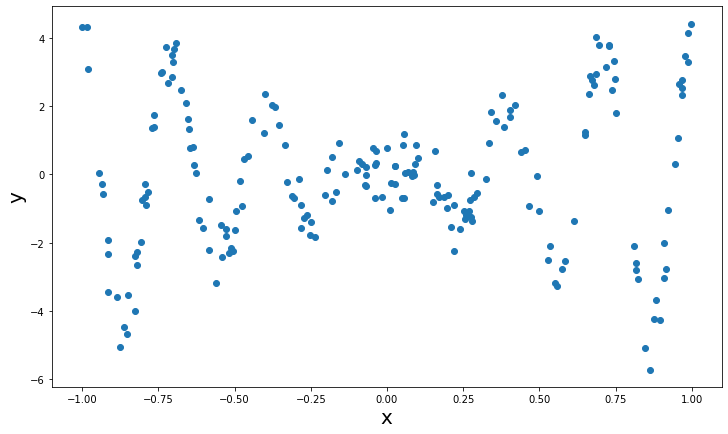

In [4]:
m=200
x = -1 + 2*np.random.rand(m)
y = 5*x*np.sin(20*x)+ 0.5*np.random.randn(m)

plt.figure(figsize=(12,7))
plt.plot(x,y,'o')
plt.xlabel('x',fontsize=20)
plt.ylabel('y',fontsize=20)

In [5]:
# train/test split
x_train, y_train = x[0:150], y[0:150] #first 3/4
x_test, y_test = x[150:m], y[150:m] #last 1/4

Let's fit a polynomial to the training set.

Training Set Mean Squared Error: 0.21244358466408853
Test Set Mean Squared Error: 370495754.11852753


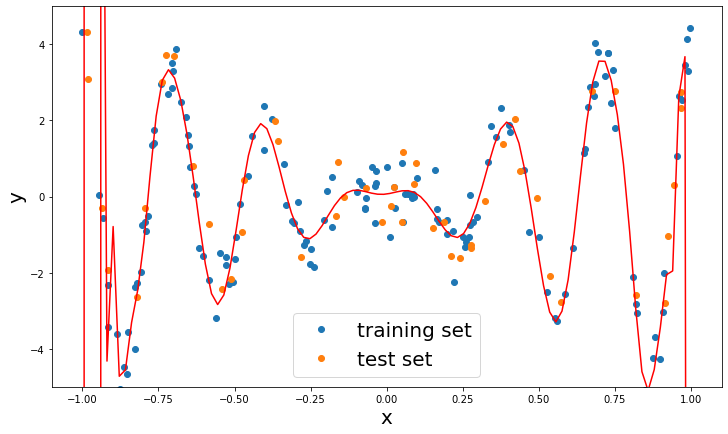

In [17]:
degree = 200 # try 1, 20 and 200
m_train = len(x_train) # size of the training set
m_test = len(x_test) # size of the test set
m_plot = 100 # 
x_plot = np.linspace(-1,1,m_plot) 

'build feature matrices'
X_train = np.ones((m_train,degree+1))
X_test = np.ones((m_test,degree+1))
X_plot = np.ones((m_plot,degree+1))
for i in range(degree):
    X_train[:,i+1] = x_train**(i+1)
    X_test[:,i+1] = x_test**(i+1)
    X_plot[:,i+1] = x_plot**(i+1)
    
'fit a polynomial to the training set'
theta = np.linalg.solve(X_train.T.dot(X_train), X_train.T.dot(y_train))

'plot datapoints'
plt.figure(figsize=(12,7))
plt.plot(x_train,y_train,'o',label='training set')
plt.plot(x_test,y_test,'o',label='test set')
plt.legend(fontsize=20)
plt.xlabel('x',fontsize=20)
plt.ylabel('y',fontsize=20)
plt.ylim([-5,5])

'plot the polynomial'       
y_plot = X_plot.dot(theta)
plt.plot(x_plot,y_plot,'r',label='linear model')

'Mean Squared Error'
MSE_train = np.linalg.norm(y_train-X_train.dot(theta))**2/len(x_train)
MSE_test = np.linalg.norm(y_test-X_test.dot(theta))**2/len(x_test)
print('Training Set Mean Squared Error: '+str(MSE_train))
print('Test Set Mean Squared Error: '+str(MSE_test))

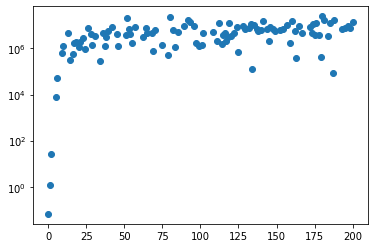

In [18]:
# plot the polynomial coefficients
plt.semilogy(theta,'o')

Let's plot the MSE as a function of the degree:

Text(0, 0.5, 'mean squared error')

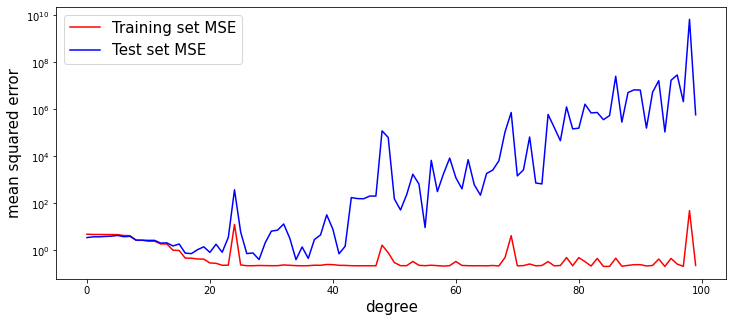

In [9]:
max_degree = 100
# initialize MSE vectors
MSE_test = np.zeros(max_degree)
MSE_train = np.zeros(max_degree)
# loop over degrees
for degree in range(max_degree): # degree = 0, 1, 2, ..., max_degree
    'build feature matrices'
    X_train = np.ones((m_train,degree+1))
    X_test = np.ones((m_test,degree+1))
    for i in range(degree):
        X_train[:,i+1] = x_train**(i+1)
        X_test[:,i+1] = x_test**(i+1)
        
    'best linear model'
    theta = np.linalg.solve(X_train.T.dot(X_train), X_train.T.dot(y_train))
    
    'Mean squared errors'
    MSE_train[degree]=np.linalg.norm(y_train-X_train.dot(theta))**2/len(x_train)
    MSE_test[degree]=np.linalg.norm(y_test-X_test.dot(theta))**2/len(x_test)

# plot results
plt.figure(figsize=(12,5))
plt.semilogy(range(max_degree),MSE_train,'r-',label='Training set MSE') #semilogarithmic plot
plt.semilogy(range(max_degree),MSE_test,'b-',label='Test set MSE')
plt.legend(fontsize = 15)
plt.xlabel('degree', fontsize=15)
plt.ylabel('mean squared error', fontsize=15)

# Regularization

Training Set Mean Squared Error: 0.4506661883421405
Test Set Mean Squared Error: 3.2261749028865756


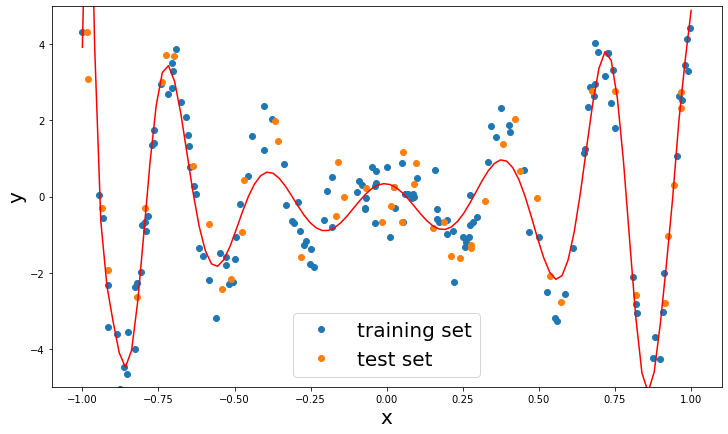

In [39]:
degree = 50 #
C = 1e-8 # regularization constant
m_train = len(x_train) # size of the training set
m_test = len(x_test) # size of the test set
m_plot = 100 # 
x_plot = np.linspace(-1,1,m_plot) 

'build feature matrices'
X_train = np.ones((m_train,degree+1))
X_test = np.ones((m_test,degree+1))
X_plot = np.ones((m_plot,degree+1))
for i in range(degree):
    X_train[:,i+1] = x_train**(i+1)
    X_test[:,i+1] = x_test**(i+1)
    X_plot[:,i+1] = x_plot**(i+1)
    
'best linear model'
theta = np.linalg.solve(X_train.T.dot(X_train)+C*np.identity(degree+1), X_train.T.dot(y_train))

'plot datapoints'
plt.figure(figsize=(12,7))
plt.plot(x_train,y_train,'o',label='training set')
plt.plot(x_test,y_test,'o',label='test set')
plt.legend(fontsize=20)
plt.xlabel('x',fontsize=20)
plt.ylabel('y',fontsize=20)
plt.ylim([-5,5])

'plot linear model'       
y_plot = X_plot.dot(theta)
plt.plot(x_plot,y_plot,'r',label='linear model')

'Mean Squared Error'
MSE_train = np.linalg.norm(y_train-X_train.dot(theta))**2/len(x_train)
MSE_test = np.linalg.norm(y_test-X_test.dot(theta))**2/len(x_test)
print('Training Set Mean Squared Error: '+str(MSE_train))
print('Test Set Mean Squared Error: '+str(MSE_test))

We can plot the training and test mean squared errors as a function of the regularization constant  𝐶 .

Text(0.5, 0, 'regularization constant')

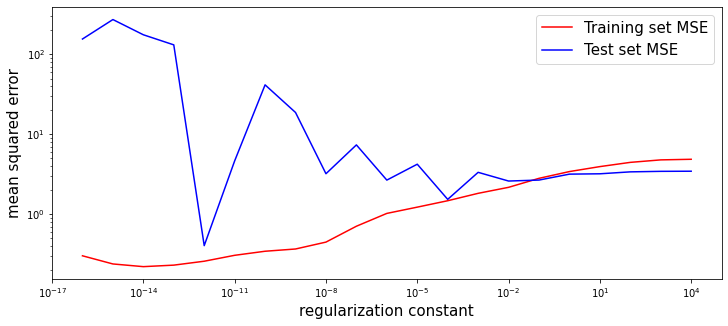

In [38]:
degree = 50
C_list = 10.0**(np.arange(-16,5)) # regularization constants

'initialize MSE vectors'
MSE_test = np.zeros(len(C_list))
MSE_train = np.zeros(len(C_list))
for idx,C in enumerate(C_list): 
    'build feature matrices'
    X_train = np.ones((m_train,degree+1))
    X_test = np.ones((m_test,degree+1))
    for i in range(degree):
        X_train[:,i+1] = x_train**(i+1)
        X_test[:,i+1] = x_test**(i+1)
        
    'best linear model'
    theta = np.linalg.solve(X_train.T.dot(X_train)+C*np.identity(degree+1), X_train.T.dot(y_train))
    
    'Mean squared errors'
    MSE_train[idx]=np.sum((y_train-X_train.dot(theta))**2)/len(x_train)
    MSE_test[idx]=np.sum((y_test-X_test.dot(theta))**2)/len(x_test)

'plot results'
plt.figure(figsize=(12,5))
plt.loglog(C_list,MSE_train,'r-',label='Training set MSE') 
plt.loglog(C_list,MSE_test,'b-',label='Test set MSE')
plt.legend(fontsize = 15)
plt.ylabel('mean squared error', fontsize=15)
plt.xlabel('regularization constant', fontsize=15)